# Intro to Phylogenetics

In [1]:
from phylogenetics import PhylogeneticsProject

In [2]:
# Initialize
project = PhylogeneticsProject('example', overwrite=True)

# Add an alignment
project.read_data(
    dtype='tips', 
    path='PF08793_seed.fasta',
    schema='fasta'
)

# Run a tree
project.compute_tree()

# Run a reconstruction
# project.compute_reconstruction()

PhylogeneticsProject(project_dir=example)
    last modified	2018-07-07 15:04:21
    last edit		compute_tree
    tips		True
        - num of tips	18
    ancs		False
    tree		True

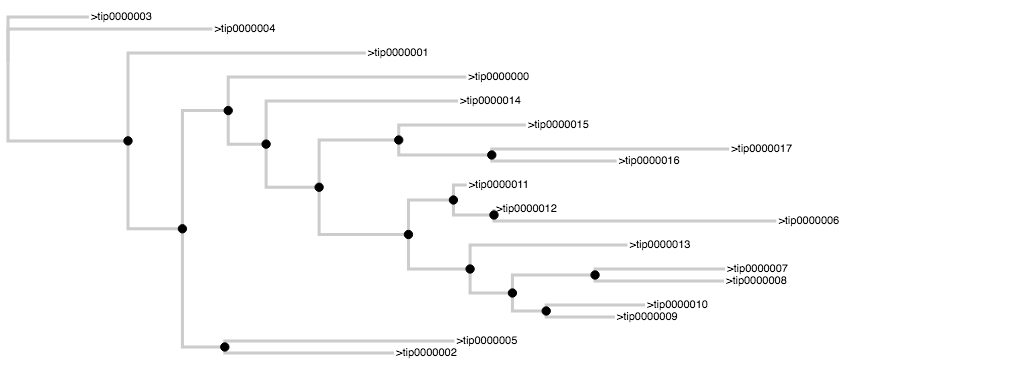

In [3]:
project.show()